In [151]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import set_config
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
pd.options.display.float_format = '{:.2f}'.format
set_config(display="diagram")

In [152]:
from dataset.world_bank import CountyDataSet
dataset = CountyDataSet(country_code='UKR')
data = dataset.by_indicator_names.T
indicator = 'GDP (constant LCU)'
gdp = data[indicator]
gdp.index = pd.to_datetime(gdp.index)
df = pd.DataFrame(list(gdp.items()), columns=['Date', 'GDP'])
df.set_index('Date', inplace = True)

In [153]:
df = df.dropna()

In [154]:
df

,GDP
Date,
1987-01-01,4139940476000.00
1988-01-01,4246190527700.00
1989-01-01,4410649869400.00
1990-01-01,4130783764500.00
1991-01-01,3771405577000.00
1992-01-01,3398036424800.00
1993-01-01,2915515252500.00
1994-01-01,2247862259700.00
1995-01-01,1973623064000.00


In [155]:
df_GDP = df['GDP']

In [156]:
time_series_df = pd.DataFrame({'GDP': df_GDP,
                               'GDP 1 year ago': df_GDP.shift(1),
                               'GDP 2 years ago': df_GDP.shift(2)})


# drop NaN values
time_series_df.dropna(inplace = True)

# print the new DataFrame
time_series_df

,GDP,GDP 1 year ago,GDP 2 years ago
Date,,,
1989-01-01,4410649869400.00,4246190527700.00,4139940476000.00
1990-01-01,4130783764500.00,4410649869400.00,4246190527700.00
1991-01-01,3771405577000.00,4130783764500.00,4410649869400.00
1992-01-01,3398036424800.00,3771405577000.00,4130783764500.00
1993-01-01,2915515252500.00,3398036424800.00,3771405577000.00
1994-01-01,2247862259700.00,2915515252500.00,3398036424800.00
1995-01-01,1973623064000.00,2247862259700.00,2915515252500.00
1996-01-01,1776260757600.00,1973623064000.00,2247862259700.00
1997-01-01,1722972934900.00,1776260757600.00,1973623064000.00


In [157]:
def DistributionPlot(YellowFunction, BlueFunction, YellowName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(YellowFunction, hist=False, color="y", label=YellowName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('GDP')
    plt.ylabel('Proportion of GDP')

    plt.show()
    plt.close()

In [158]:
time_series_df.corr()

,GDP,GDP 1 year ago,GDP 2 years ago
GDP,1.00,0.93,0.82
GDP 1 year ago,0.93,1.00,0.95
GDP 2 years ago,0.82,0.95,1.00


In [159]:
y_data = time_series_df['GDP']

In [160]:
y_data

Date
1989-01-01   4410649869400.00
1990-01-01   4130783764500.00
1991-01-01   3771405577000.00
1992-01-01   3398036424800.00
1993-01-01   2915515252500.00
1994-01-01   2247862259700.00
1995-01-01   1973623064000.00
1996-01-01   1776260757600.00
1997-01-01   1722972934900.00
1998-01-01   1690236449100.00
1999-01-01   1686855976200.00
2000-01-01   1786380478800.00
2001-01-01   1943581961000.00
2002-01-01   2047362380900.00
2003-01-01   2242201871200.00
2004-01-01   2506677486300.00
2005-01-01   2583663327100.00
2006-01-01   2779283348700.00
2007-01-01   3007624945500.00
2008-01-01   3075100758400.00
2009-01-01   2609639118900.00
2010-01-01   2716425665600.00
2011-01-01   2864342671100.00
2012-01-01   2868705493700.00
2013-01-01   2870009007500.00
2014-01-01   2580743813600.00
2015-01-01   2328528050700.00
2016-01-01   2385367000000.00
2017-01-01   2441661000000.00
2018-01-01   2526834982800.00
2019-01-01   2607681165700.00
2020-01-01   2509820000000.00
2021-01-01   2596299000000.00
2022-

In [161]:
x_data=time_series_df.drop('GDP',axis=1)

In [162]:
x_data

,GDP 1 year ago,GDP 2 years ago
Date,,
1989-01-01,4246190527700.00,4139940476000.00
1990-01-01,4410649869400.00,4246190527700.00
1991-01-01,4130783764500.00,4410649869400.00
1992-01-01,3771405577000.00,4130783764500.00
1993-01-01,3398036424800.00,3771405577000.00
1994-01-01,2915515252500.00,3398036424800.00
1995-01-01,2247862259700.00,2915515252500.00
1996-01-01,1973623064000.00,2247862259700.00
1997-01-01,1776260757600.00,1973623064000.00


In [163]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.37, shuffle=False)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 13
number of training samples: 21


In [164]:
lr = LinearRegression()
lr.fit(x_train[['GDP 1 year ago', 'GDP 2 years ago']], y_train)

LinearRegression()

In [165]:
yhat_train = lr.predict(x_train[['GDP 1 year ago', 'GDP 2 years ago']])
yhat_train

array([4.09805392e+12, 4.28580547e+12, 3.71420970e+12, 3.33875139e+12,
       2.99877542e+12, 2.49291574e+12, 1.76807166e+12, 1.81310774e+12,
       1.69492725e+12, 1.75305702e+12, 1.73914930e+12, 1.75759749e+12,
       1.92063226e+12, 2.10158499e+12, 2.15423960e+12, 2.39280773e+12,
       2.67723705e+12, 2.60833845e+12, 2.86772948e+12, 3.09329256e+12,
       3.03543377e+12])

In [166]:
yhat_test = lr.predict(x_test[['GDP 1 year ago', 'GDP 2 years ago']])
yhat_test

array([2.23522084e+12, 2.74735304e+12, 2.90802451e+12, 2.80706393e+12,
       2.80598149e+12, 2.33834749e+12, 2.14264088e+12, 2.41849264e+12,
       2.46781377e+12, 2.56412594e+12, 2.63236964e+12, 2.41545802e+12,
       2.62642959e+12])

In [167]:
predicted_data = time_series_df

In [168]:
result = np.concatenate((yhat_train, yhat_test), axis=0)

In [169]:
predicted_data['train_data'] = result
columns_to_drop = ['GDP 1 year ago', 'GDP 2 years ago']

predicted_data = predicted_data.drop(columns=columns_to_drop)

<Figure size 1500x700 with 0 Axes>

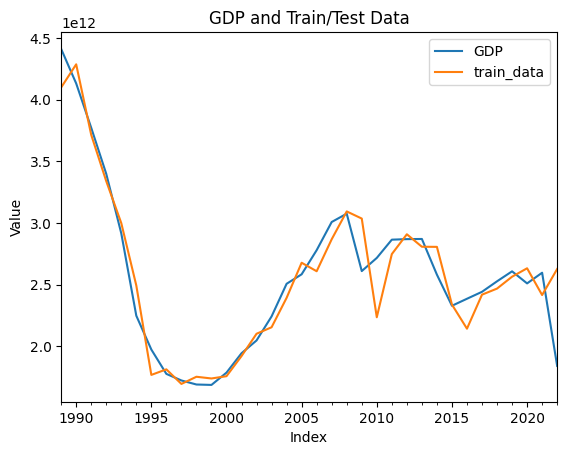

In [170]:
width = 15
height = 7
plt.figure(figsize=(width, height))

predicted_data.plot()

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('GDP and Train/Test Data')

plt.legend()
plt.show()


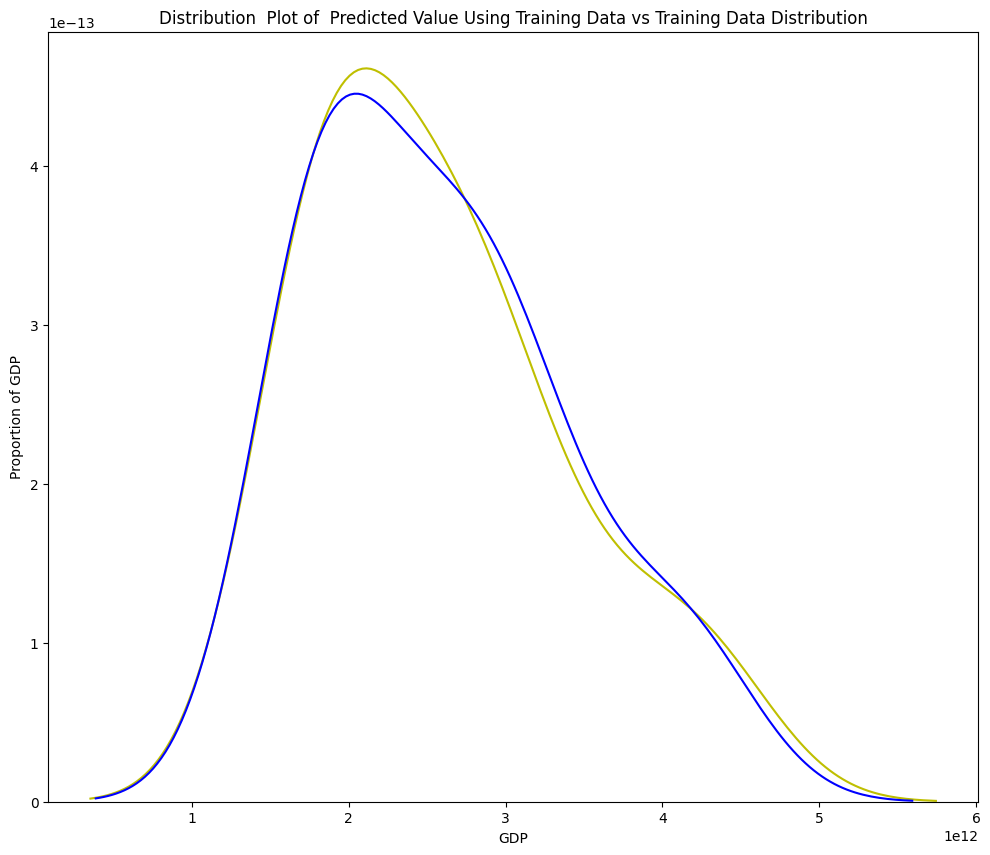

In [171]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

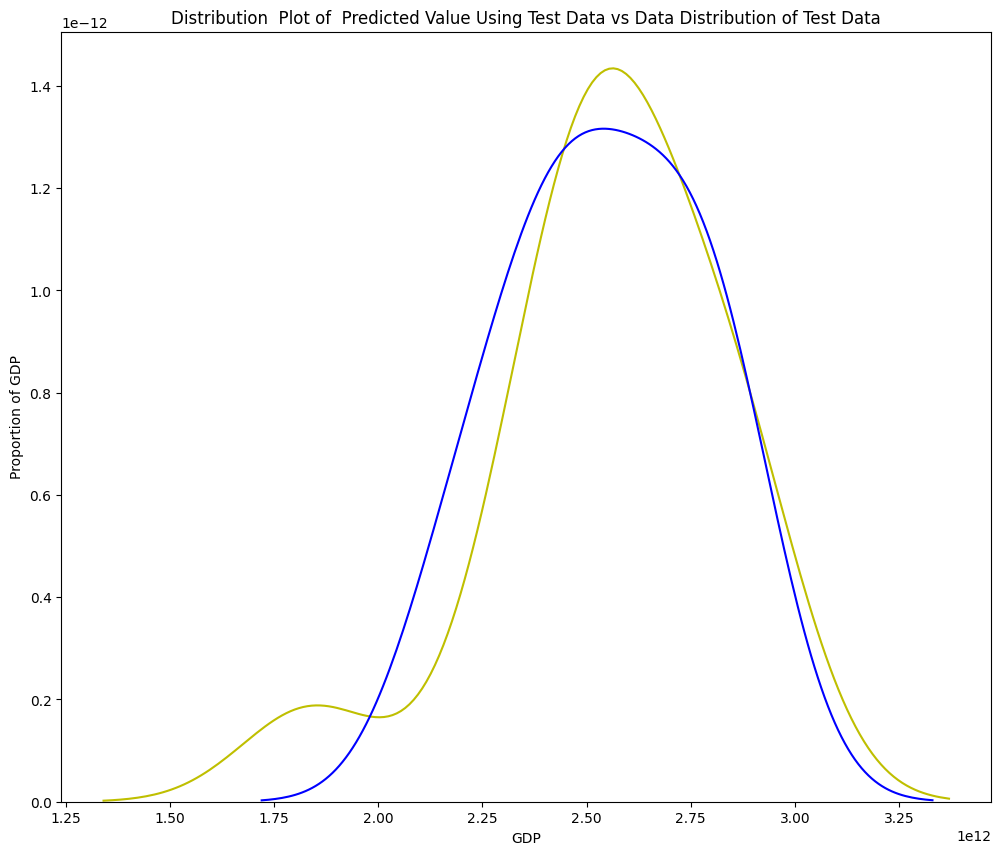

In [172]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [173]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['GDP 1 year ago']])
x_test_pr = pr.fit_transform(x_test[['GDP 1 year ago']])
pr

PolynomialFeatures(degree=4)

In [174]:
x_train_pr

array([[1.00000000e+00, 4.24619053e+12, 1.80301340e+25, 7.65593842e+37,
        3.25085732e+50],
       [1.00000000e+00, 4.41064987e+12, 1.94538323e+25, 8.58040428e+37,
        3.78451590e+50],
       [1.00000000e+00, 4.13078376e+12, 1.70633745e+25, 7.04851104e+37,
        2.91158750e+50],
       [1.00000000e+00, 3.77140558e+12, 1.42235000e+25, 5.36425873e+37,
        2.02307953e+50],
       [1.00000000e+00, 3.39803642e+12, 1.15466515e+25, 3.92359425e+37,
        1.33325162e+50],
       [1.00000000e+00, 2.91551525e+12, 8.50022919e+24, 2.47825478e+37,
        7.22538962e+49],
       [1.00000000e+00, 2.24786226e+12, 5.05288474e+24, 1.13581889e+37,
        2.55316442e+49],
       [1.00000000e+00, 1.97362306e+12, 3.89518800e+24, 7.68763287e+36,
        1.51724895e+49],
       [1.00000000e+00, 1.77626076e+12, 3.15510228e+24, 5.60428436e+36,
        9.95467039e+48],
       [1.00000000e+00, 1.72297293e+12, 2.96863573e+24, 5.11487902e+36,
        8.81279812e+48],
       [1.00000000e+00, 1.6902

In [175]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [176]:
yhat = poly.predict(x_test_pr)
yhat

array([2.44192614e+12, 2.53219386e+12, 2.66327132e+12, 2.66723722e+12,
       2.66842320e+12, 2.41816985e+12, 2.22375826e+12, 2.26547469e+12,
       2.30801571e+12, 2.37463842e+12, 2.44030721e+12, 2.36111599e+12,
       2.43092230e+12])

In [177]:
poly_graph = LinearRegression()
poly_graph.fit(x_train_pr, y_train)
ytrain_predict = poly_graph.predict(x_train_pr)
ytest_predict = poly_graph.predict(x_test_pr)

Polynomial_prediction = time_series_df
Polynomial_prediction

# Polynomial_prediction = predicted_data.drop(columns=['GDP 1 year ago', 'GDP 2 years ago'])
polynomial_result = np.concatenate((ytrain_predict, ytest_predict), axis=0)

Polynomial_prediction['Polynomial prediction'] = polynomial_result
cols = ['GDP 1 year ago', 'GDP 2 years ago']
Polynomial_prediction = Polynomial_prediction.drop(columns=cols)
Polynomial_prediction

,GDP,train_data,Polynomial prediction
Date,,,
1989-01-01,4410649869400.00,4098053924817.40,4040112005720.16
1990-01-01,4130783764500.00,4285805473761.45,4190865611977.17
1991-01-01,3771405577000.00,3714209703248.76,3929063771642.86
1992-01-01,3398036424800.00,3338751385447.40,3566101732115.75
1993-01-01,2915515252500.00,2998775423379.22,3181631727960.15
1994-01-01,2247862259700.00,2492915742440.62,2710127539839.09
1995-01-01,1973623064000.00,1768071662504.84,2166734300586.89
1996-01-01,1776260757600.00,1813107741458.46,1992681815197.16
1997-01-01,1722972934900.00,1694927253661.14,1886913084222.54


<Axes: xlabel='Date'>

<Figure size 1200x500 with 0 Axes>

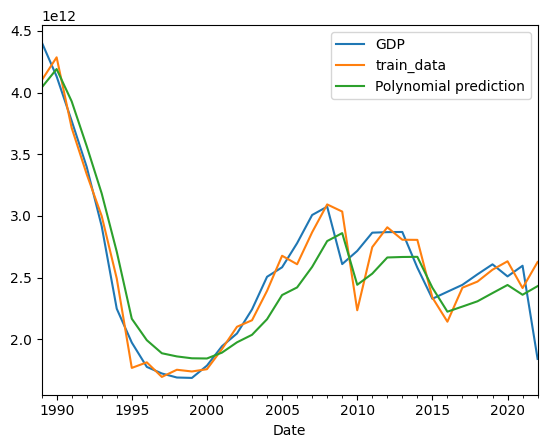

In [178]:
width = 12
height = 5
plt.figure(figsize=(width, height))

Polynomial_prediction.plot()



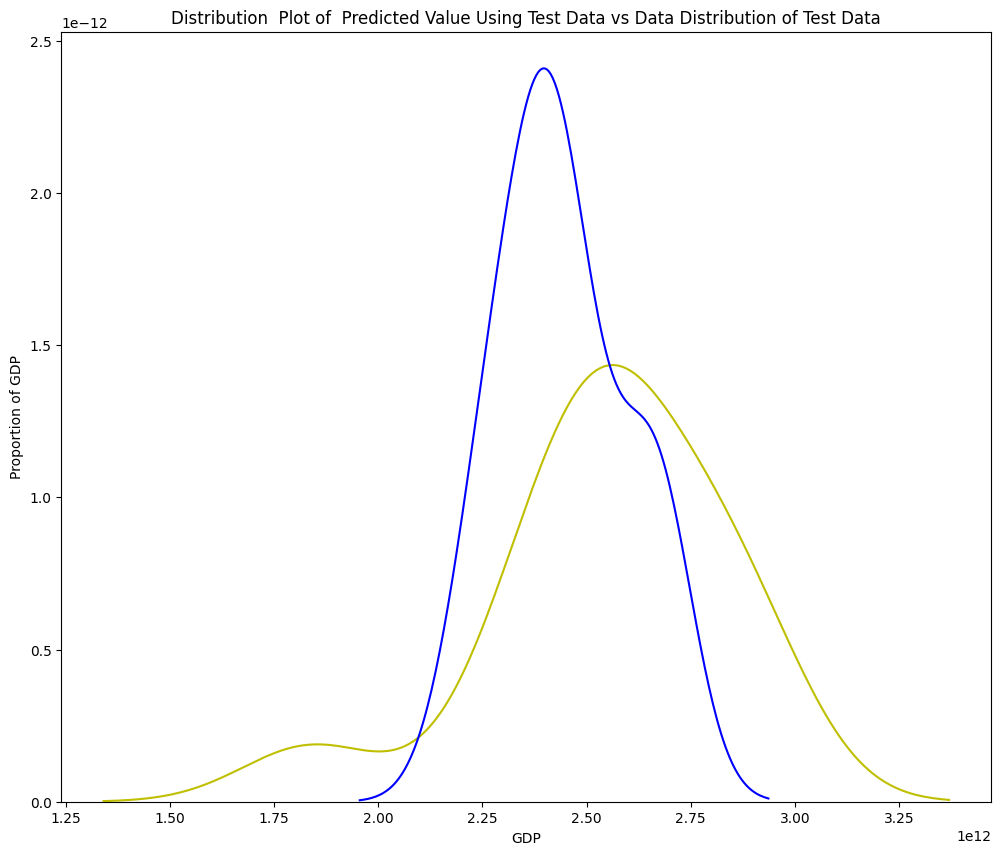

In [179]:


Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, ytest_predict, "Actual Values (Test)", "Predicted Values (Test)", Title)

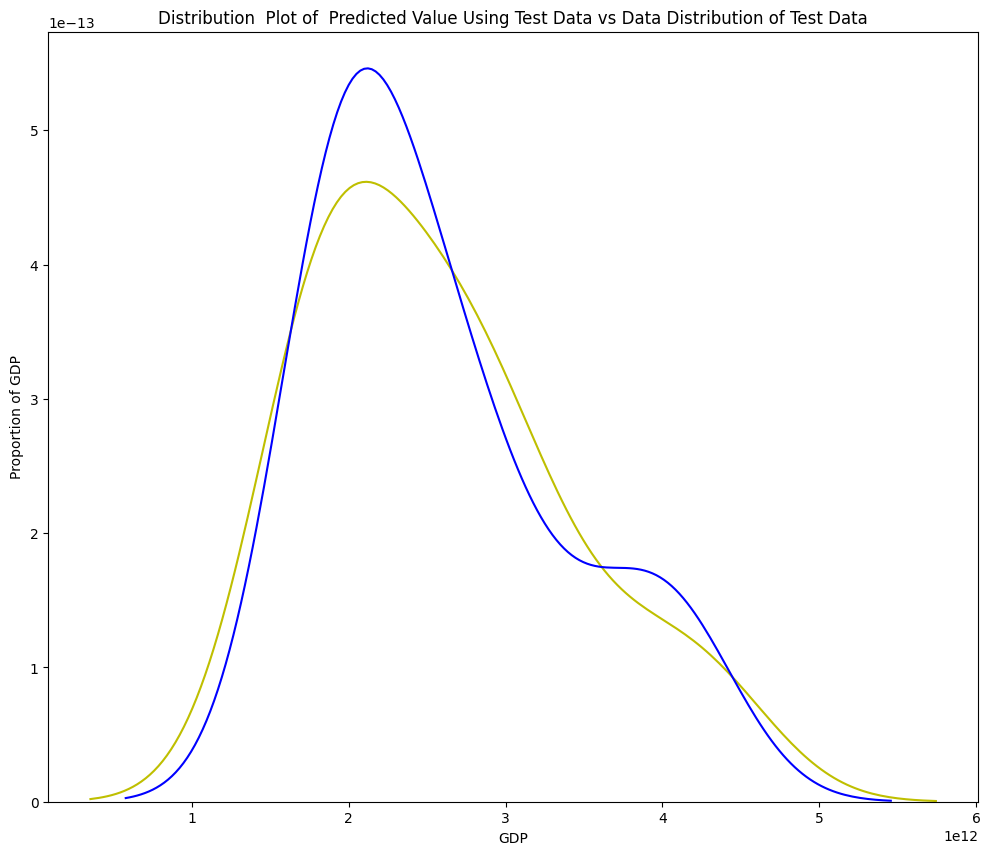

In [180]:


Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_train, ytrain_predict, "Actual Values (Test)", "Predicted Values (Test)", Title)